# Analysis

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler



In [3]:
class CustomeOneHotEncoder:
    def __init__(self,drop=False):
        self.columns_ = None
        self.drop_ = drop
        self.encoder = OneHotEncoder()
        
    def fit(self,data,columns):
        self.columns_ = columns
        self.encoder.fit(data[self.columns_])
    
    def fit_transform(self,data,columns):
        self.fit(data,columns)
        return self.transform(data)
    
    def transform(self,data):
        feature_array = self.encoder.transform(data[self.columns_]).toarray()
        feature_label = self.encoder.categories_
        new_feature_label = []
        for x,y in zip(self.columns_,feature_label):
            new_feature_label.append([x+'_'+str(z) for z in y])

        final_feature_label= np.concatenate([x for x in new_feature_label])
        encoded_df = pd.DataFrame(feature_array,columns=final_feature_label,index = data.index)

        if self.drop_:
            cols_to_drop = [x[0] for x in new_feature_label]
            encoded_df = encoded_df.drop(cols_to_drop,axis=1)
        data = data.drop(self.columns_,axis=1)   
        #return encoded_df
        return pd.concat([data,encoded_df],axis=1)
    


# Linear Regression

In [4]:
pd.options.display.max_rows=None

In [5]:
data = pd.read_csv('train_1.csv')

data.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_Codes,Title,Total_Members,Age_Group,Fare_Group,Age_Class,fare_per_person,Alone
0,1,0,3,0,1,0,0,0,0,1,2,0,66,3,0
1,2,1,1,1,1,0,1,1,2,1,5,3,38,35,0
2,3,1,3,1,0,0,0,0,1,0,3,0,78,7,1
3,4,1,1,1,1,0,0,1,2,1,5,3,35,26,0
4,5,0,3,0,0,0,0,0,0,0,5,1,105,8,1


In [6]:
#data = data.sample(frac=1)

**For Getting equal no of classes**

In [10]:


temp = data[(data['Survived'] == 0) ].iloc[:342,:]
temp2 = data[(data['Survived'] == 1) ]
data.head()
data = pd.concat([temp,temp2]).sort_values(by='PassengerId')
data.head()


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_Codes,Title,Total_Members,Age_Group,Fare_Group,Age_Class,fare_per_person,Alone
0,1,0,3,0,1,0,0,0,0,1,2,0,66,3,0
1,2,1,1,1,1,0,1,1,2,1,5,3,38,35,0
2,3,1,3,1,0,0,0,0,1,0,3,0,78,7,1
3,4,1,1,1,1,0,0,1,2,1,5,3,35,26,0
4,5,0,3,0,0,0,0,0,0,0,5,1,105,8,1


In [11]:

dataset = data.copy()


## Train And test Dataset

In [12]:
y = dataset['Survived']
print('All Columns : {}'.format(dataset.columns.values))
#cols_to_drop = ['Survived','PassengerId']
cols_to_drop = ['Survived','PassengerId','Parch', 'Alone','Embarked','SibSp']
cols_to_inc = list(set(dataset.columns) - set(cols_to_drop))
print(' Dropped Columns : {}'.format(cols_to_drop))

x = dataset.drop(cols_to_drop,axis=1)
cat_columns = []
#cat_columns = ['Sex', 'Age_Group', 'Title', , 'Fare_Group', 'Cabin_Codes', 'Age_Class','Pclass']
#cat_columns = ['Sex','Pclass','Title',]
num_columns = list(set(x.columns)- set(cat_columns))
print('Cateogrical Columns : {} \n Numerical Columns : {}'.format(cat_columns,num_columns))
x.head()

All Columns : ['PassengerId' 'Survived' 'Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked'
 'Cabin_Codes' 'Title' 'Total_Members' 'Age_Group' 'Fare_Group'
 'Age_Class' 'fare_per_person' 'Alone']
 Dropped Columns : ['Survived', 'PassengerId', 'Parch', 'Alone', 'Embarked', 'SibSp']
Cateogrical Columns : [] 
 Numerical Columns : ['Sex', 'Fare_Group', 'Age_Class', 'Title', 'Total_Members', 'fare_per_person', 'Age_Group', 'Pclass', 'Cabin_Codes']


,Pclass,Sex,Cabin_Codes,Title,Total_Members,Age_Group,Fare_Group,Age_Class,fare_per_person
0,3,0,0,0,1,2,0,66,3
1,1,1,1,2,1,5,3,38,35
2,3,1,0,1,0,3,0,78,7
3,1,1,1,2,1,5,3,35,26
4,3,0,0,0,0,5,1,105,8


In [13]:
'''
encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=cat_columns)
x.head()'''

'\nencoder = CustomeOneHotEncoder(drop=True)\nx = encoder.fit_transform(x,columns=cat_columns)\nx.head()'

In [14]:
'''scaler = StandardScaler()
x[num_columns] = scaler.fit_transform(x[num_columns])
x.head()'''

'scaler = StandardScaler()\nx[num_columns] = scaler.fit_transform(x[num_columns])\nx.head()'

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,shuffle=True,random_state=1)

x_train.shape,x_test.shape


print('Test Shape : {} , Train Shape {}'.format(x_test.shape,x_train.shape))

Test Shape : (137, 9) , Train Shape (547, 9)


# Modelling

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

**SVM**

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
#C=10,degree=2,kernel='poly'
model = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
model = model.fit(x_train,y_train)
#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))

#print('Train Accuracy:' ,metrics.accuracy_score(y_train, res.predict(x_train)))
#print('Test Accuracy:' ,metrics.accuracy_score(y_test, res.predict(x_test)))


In [20]:
accuracy_score(y_train,model.predict(x_train))

0.9597806215722121

In [21]:
print('Train Accuracy:', accuracy_score(y_train,model.predict(x_train)))
print('Test Accuracy:', accuracy_score(y_test,model.predict(x_test)))

Train Accuracy: 0.9597806215722121
Test Accuracy: 0.7883211678832117


In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,f1_score,roc_auc_score

In [23]:
print('Accuracy  : %.2f'%accuracy_score(y_test,model.predict(x_test)))
print('Precision : %.2f'%precision_score(y_test,model.predict(x_test)))
print('Recall : %.2f'%recall_score(y_test,model.predict(x_test)))
print('F1 Score : %.2f'%f1_score(y_test,model.predict(x_test)))

Accuracy  : 0.79
Precision : 0.83
Recall : 0.75
F1 Score : 0.79


[Text(0, 0.5, 'True Positive Rate'), Text(0.5, 0, 'False Positive Rate')]

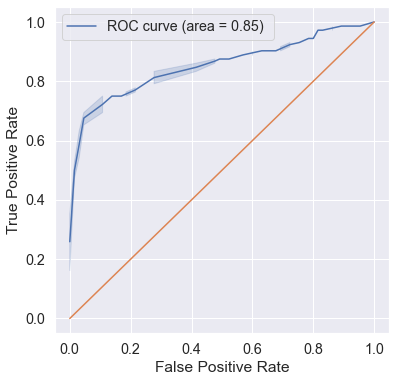

In [24]:
fpr,tpr,threshold = roc_curve(y_test,model.predict_proba(x_test)[:, 1])
sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = roc_auc_score(y_test,model.predict_proba(x_test)[:, 1])
fig =sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(2)))
sns.lineplot([0,1],[0,1],markers='--')
fig.set(xlabel='False Positive Rate',ylabel='True Positive Rate')

In [25]:
pd.DataFrame({
    'Feature' : x_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance',ascending=False)

,Feature,Importance
7,Age_Class,0.225268
3,Title,0.182973
1,Sex,0.144625
8,fare_per_person,0.140954
4,Total_Members,0.082435
5,Age_Group,0.067262
0,Pclass,0.054214
2,Cabin_Codes,0.053258
6,Fare_Group,0.049011


**KFold Validation**

In [26]:
from sklearn.model_selection import KFold,cross_validate
cv = KFold(10,True,1)
for train,test in cv.split(x):
    model.fit(x.iloc[train],y.iloc[train])
    print('Train acc :',model.score(x.iloc[train],y.iloc[train]))
    print('Test acc :',model.score(x.iloc[test],y.iloc[test]))

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Train acc : 0.9626016260162602
Test acc : 0.8695652173913043
Train acc : 0.9642276422764228
Test acc : 0.7971014492753623
Train acc : 0.9658536585365853
Test acc : 0.855072463768116
Train acc : 0.967479674796748
Test acc : 0.782608695652174
Train acc : 0.9724025974025974
Test acc : 0.7205882352941176
Train acc : 0.9707792207792207
Test acc : 0.7941176470588235
Train acc : 0.9691558441558441
Test acc : 0.8529411764705882
Train acc : 0.9707792207792207
Test acc : 0.7352941176470589
Train acc : 0.9659090909090909
Test acc : 0.8382352941176471
Train acc : 0.9659090909090909
Test acc : 0.8676470588235294


### Cross Validation

In [27]:
cv_score = cross_validate(model,x,y,cv=10,scoring='accuracy')['test_score']
print("CV Score : Mean : %.7g | Std : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

CV Score : Mean : 0.8026215 | Std : 0.05911151 | Min : 0.7101449 | Max : 0.884058


### Grid Search, Randomized Search

In [28]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [29]:
#, 'rbf', 'poly'
parameters = { "criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1, 5, 10, 25],
              "min_samples_split" : [2, 4, 10, 12, 16],
              "n_estimators": [100, 400, 700]}


In [ ]:
cv_model = GridSearchCV(model,parameters,verbose=1,scoring='accuracy',n_jobs=-1)
cv_model.fit(x,y)


Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.3s


In [ ]:
cv_model.best_params_,cv_model.best_score_

### Randomized Search

In [165]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
from scipy.stats import uniform
C = uniform(0,1000)
parameters = {'C':C,
             'kernel' : ['poly','rbf','linear'],
        }


In [37]:
cv_model = RandomizedSearchCV(model,parameters,cv=7,scoring='accuracy',n_jobs=5,verbose=1)
cv_model.fit(x,y)


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 7 folds for each of 3 candidates, totalling 21 fits


ValueError: Invalid parameter kernel for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [156]:
cv_model.best_params_,cv_model.best_score_

({'C': 18.20729221822248, 'degree': 3, 'kernel': 'poly'}, 0.8260949803149608)

## Create Submission

In [166]:
test_data = pd.read_csv('test_1.csv')
test_data = test_data.sample(frac=1)
passenger_id = test_data.PassengerId
test_data = test_data.drop(cols_to_drop[1:],axis=1)
test_data.head()

,Pclass,Sex,Embarked,Cabin_Codes,Title,Total_Members,Age_Group,Fare_Group,Age_Class,fare_per_person
241,2,1,0,0,2,2,6,2,90,10
28,1,0,0,5,0,0,6,2,41,30
303,3,0,0,0,0,0,2,1,72,8
13,2,0,0,0,0,1,6,2,126,13
289,3,0,0,0,0,0,4,1,96,8


In [132]:
test_data = encoder.transform(test_data)
test_data.head()

KeyError: "['Alone'] not in index"

In [77]:
test_data[num_columns] = scaler.fit_transform(test_data[num_columns])
#test_data = test_data.iloc[:,1:]
test_data.head()

,Parch,Fare,Multiply,fare_per_person,Cabin_Codes_B,Cabin_Codes_C,Cabin_Codes_D,Cabin_Codes_E,Cabin_Codes_F,Cabin_Codes_G,...,Title_Jonkheer,Title_Jr,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev
320,-0.400248,-0.498042,0.661880,-0.393575,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88,-0.400248,-0.498491,0.207518,-0.394278,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0,-0.400248,-0.497071,1.627400,-0.392051,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
149,0.619896,-0.171372,-0.019664,-0.368501,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296,1.640039,0.107875,-2.215749,-0.319904,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [167]:
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': cv_model.predict(test_data)
                        })
result = result.sort_values(by='PassengerId')

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished


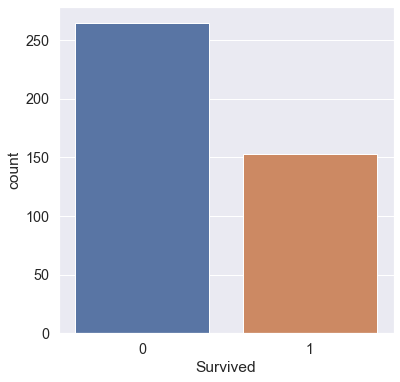

In [168]:
sns.countplot(result['Survived'])

In [169]:
result.shape

(418, 2)

In [170]:
result.to_csv('Prediction_33.csv',index=False)